# ABC Insurance: Customer Segmentation with K-Mean Clustering


Cátia Simas | m20210827 <br>
Paula Eveling | m20210331 <br>
Zukiswa Mdingi | m20210408



16 January 2022


## 1. Introduction

Not all customers are alike. Their preferences, buying power, and other characteristics will differ over a wide spectrum (<a href="https://towardsdatascience.com/elbows-and-silhouettes-hands-on-customer-segmentation-in-python-66c2e794c552">Onnen, Heiko. 2021</a>). While mass marketing tactics are still able to get results, the assumption that simply everyone will be interested in buying what a company is selling is a time-consuming, inefficient, and expensive strategy (<a href="https://uplandsoftware.com/bluevenn/resources/blog/the-importance-of-customer-segmentation/">Upland Software</a>). Common characteristics in customer segments can guide how a company markets to individual segments and what products it promotes to them, tailoring the marketing efforts to various audicences subsets. This process is called Customer Segmentation.

Customer segmentation is the process of dividing customers and prospects into different groups, each of which share characteristics and behave similarly within a segment, but look and behave differently across multiple segments. Customers can be segmented based on demographics (age, gender, income), according to the characteristics that influences purchasing decisions, or grouped based on where they are located, among others.

With that said, this project is concerned with developing different customer profiles for the Marketing Department of an insurance company called ABC Insurance Limited, using the data mining clustering algorithm K-means in Python following the CRISP-DM (Cross Industry Standard Process for Data Mining) model. This tool allows a Customer Segmentation such that it will be possible for the marketing department of the company to better understand all the different customer profiles.


## 2. Business Understanding


### 2.1 Determine Business Objectives

#### Background

ABC Insurance Limited is an insurance company that offers its clients short-term and long-term insurance including motor, household, health, life, and work insurance. The company has a vast client base, which is very diversified from having young and elderly customers with different education qualifications and ranging monthly salaries.

Due to this vast client base, the marketing department is currently facing a challenge: how to attract new clients and ensure customer retention in a cost-effective way. If the marketing department could have a better understanding of their clients’ profiles, they would be able to market effectively to try and to achieve their mandate. 

#### Business Objectives

The main objective of this project is to develop a customer segmentation in such a way that it will be possible for the marketing department to understand all the different customer profiles and tailor its strategies accordingly. This will allow the company to scale while retaining customers and increasing their monetary value by offering different products.


#### Business Success Criteria

For the project to be considered a success, a maximum of six customer profiles must be identified and its characteristics well described. This information should provide insights on how to market to each group based on their similarities.

As a result of a more data-driven marketing approach, the department expects to increase the retention rate of customers with high monetary value by 10% and increase the acquisition of customers by at least 15% in the next two quarters. 




### 2.2 Assess Situation

#### Inventory of Resources

 To implement this project, a SAS dataset containing 10,296 observations and fourteen variables was provided for analysis. In addition, two stakeholders with strong business domain were assigned to answer eventual questions and provide insights to the investigation. In terms of technical administrators, the team is composed of three members: a mathematician, data scientist and a data miner. The technology available for the execution of this project is Jupyter Notebook and Python as a programming language. 


#### Requirements

- The deliverables, written report and Jupyter Notebook, must be submitted to the stakeholders for evaluation by January 16th, 2022, in Moodle.
- A walkthrough section scheduled with the stakeholders on January 29th.
- Expected to define, describe and explain the chosen clusters.
- The project must comply with the General Data Protection Regulation (GDPR).


    
#### Assumptions

- First policy year cannot be greater than 2016.
- The birthday year cannot be greater than the first-year policy.
- Not all premiums can be null in the same row.
- Will probably need to have discussions with the stakeholders to get clarity on uncertainties we might have about the data.
- Will need to assess the results of the clustering to ensure that the selected clusters and reasoning we suggest make sense in the real-world.

    
#### Risks and contingencies

No major risks are foreseen that would result in the complete failure of the project. The time constraints of the consultants working on this project could be a fact which could result in some delays in the set project timelines. These time constraints are from the uncertainties that might emerge in the data preparation and clustering activities, if unforeseen circumstances do arise then unplanned consultations with the experts might be required. To plan for this type of risk time management is very important, therefore more time will be scheduled for the data preparation and clustering activities. Time will also be set aside should the need arise with the experts on any data issues experienced.


#### Cost and Benefits

<u>Costs:</u>
- The operating costs of the project.
- Might cost more for the insurance company to do marketing for different groups.

<u>Benefits:</u>
- Benefits to better understand the type of customers as a result from the data understanding activity.
- To successfully achieve the specified data mining goals.
- To successfully achieve the business goals.
- The insurance company will have a better understanding of their client base and can find ideas on how to market to different groups formed from the customer segmentation.



### 2.3 Determine Data Mining Goals

- Produce a Python source code (Jupyter notebook or .py files).
- To use the correct clustering method and be able to select the most optimal number of clusters.
- Develop a Customer Segmentation.
- To be able to justify why we chose the different approaches used in this project.
- To be able to define, describe and explain the clusters you chose.
- What would be the ideal customer for this company?
- Specify criteria for model assessment.


### 2.4 Project Plan

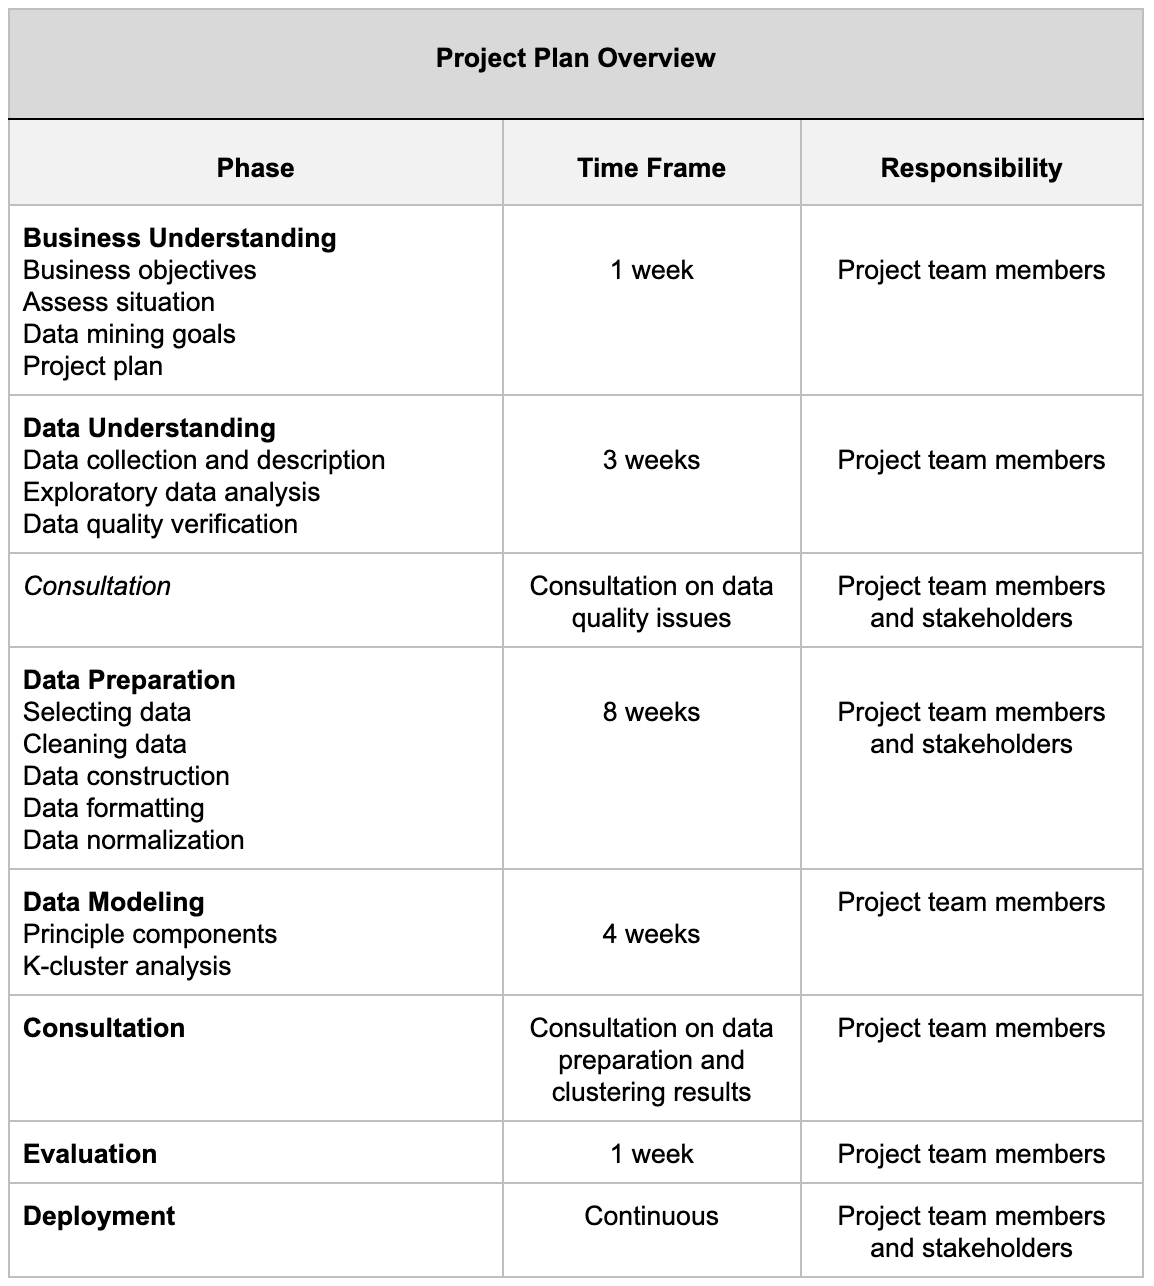

## 3. Data Understanding


### 3.1 Data Collection

The dataset used in this analysis was provided by the stakeholders in October 2021. It contains data from ABC’s customers between 1974 and 2016, with 10,296 observations and fourteen variables, where eleven of them (variables) are numerical and three are categorical, as shown on Figure 1. A detailed description of each variable and its format can be found on Appendix A: Description of the Variables. 


#### Importing Libraries

In [1]:
# importing required libraries that will be used in this project
# Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import joypy
import category_encoders as ce
import collections
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
# Global definitions
baseFolder = os.getcwd()
exportsFolder = baseFolder + os.sep +'Exports' + os.sep

In [3]:
# Graphs decoration
sns.set(color_codes = True)
sns.despine(left=True, bottom=True)
sns.set_style({'axes.facecolor':'white', 'grid.color': 'white'})

<Figure size 432x288 with 0 Axes>

#### Loading the dataset

In [4]:
# Loading the dataset and visualizing summary statistics
df = pd.read_sas('a2z_insurance.sas7bdat', format='sas7bdat')

In [5]:
# Show top 5 rows
df.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
2,3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
3,4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
4,5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


### 3.2 Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics often using statistical graphs and other data visualization methods. Through the process of EDA, one can get a better understanding of the dataset variables and the relationship between them, making it easier to discover patterns, detect outliers and anomalies, and test underlying assumptions.


#### Statistical Description

The descriptive statistics table, shown on figure 2, indicates that the dataset contains outliers, missing values, incorrect inputs, and that most of the variables may not be normally distributed. For instance, the average Premium Health (PremHealth) is equal to 171.58, while its standard deviation is 296.40, meaning that the data is very dispersed. The table also shows that the third percentile (75%) is equal to 219.82, while the maximum value observed is 28272, which clearly indicates that there is at least one severe outlier or incorrect value.

Each variable was analysed individually, in terms of frequency, distribution, and count, and the results are presented on Appendix 1: A description of the variables. Although several underlying assumptions can be made through the statistical description of the dataset, graphs such as histograms and boxplots, can make it easier to visualise such assumptions. 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustID         10296 non-null  float64
 1   FirstPolYear   10266 non-null  float64
 2   BirthYear      10279 non-null  float64
 3   EducDeg        10279 non-null  object 
 4   MonthSal       10260 non-null  float64
 5   GeoLivArea     10295 non-null  float64
 6   Children       10275 non-null  float64
 7   CustMonVal     10296 non-null  float64
 8   ClaimsRate     10296 non-null  float64
 9   PremMotor      10262 non-null  float64
 10  PremHousehold  10296 non-null  float64
 11  PremHealth     10253 non-null  float64
 12  PremLife       10192 non-null  float64
 13  PremWork       10210 non-null  float64
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
CustID,10296.0,NaN,NaN,NaN,5148.5,2972.34352,1.0,2574.75,5148.5,7722.25,10296.0
FirstPolYear,10266.0,NaN,NaN,NaN,1991.062634,511.267913,1974.0,1980.0,1986.0,1992.0,53784.0
BirthYear,10279.0,NaN,NaN,NaN,1968.007783,19.709476,1028.0,1953.0,1968.0,1983.0,2001.0
EducDeg,10279,4,b'3 - BSc/MSc',4799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthSal,10260.0,NaN,NaN,NaN,2506.667057,1157.449634,333.0,1706.0,2501.5,3290.25,55215.0
GeoLivArea,10295.0,NaN,NaN,NaN,2.709859,1.266291,1.0,1.0,3.0,4.0,4.0
Children,10275.0,NaN,NaN,NaN,0.706764,0.455268,0.0,0.0,1.0,1.0,1.0
CustMonVal,10296.0,NaN,NaN,NaN,177.892605,1945.811505,-165680.42,-9.44,186.87,399.7775,11875.89
ClaimsRate,10296.0,NaN,NaN,NaN,0.742772,2.916964,0.0,0.39,0.72,0.98,256.2
PremMotor,10262.0,NaN,NaN,NaN,300.470252,211.914997,-4.11,190.59,298.61,408.3,11604.42


The dataset provided by the stakeholders contains 10,296 observations and 14 variables, by which 13 of them (variables) are numerical and 1 is categorical. A brief description of the variables and its observations is presented below.

1. **Customer ID** (CustID), a numerical variable, has 10,296 unique observations that vary from 1 to 10,296, which is a strong indicator that there are no duplicated customers. This is also a good indicator that no customers were deleted from the dataset, which suggests that there are no missing customers. Since the objective of this project is to segment customer, this variable is irrelevant for the analysis and can therefore be removed.<br><br>

2. **Year of the customer's first policy**  (FirstPolYear), considered the first year as a customer, is a numerical variable. Its inputs vary from 1974 to 53784, which means that there is at least one incorrect input. After analyzing if there are any values higher than 2016, the current year of the database, it is possible to identify only one row in this condition, which is exactly the year of 53784. In addition to one incorrect row, there are 30 missing values that need to be dealt with accordingly.<br><br>

3. **Birth year of the customer**(BirthYear), just as the variables above, this is a numerical column. The minimum year registed was 1028, which is certainly a faulty input that needs to be treated properly. Furthermore, the birth year should always be smaller than the fist year of the policy, since purchases cannot be made by or for unborns. There are 1,997 rows that need to receive a proper treatment. Morevoer, there are 17 missing values in this column.<br><br>

4. **Academic degree** (EducDeg), a categorical variable, has only four categories and 17 missing values, which is a good indicator that this column is well distributed and somewhat balanced. In terms of missing values, there are many reasons why a dataset could contain null entries, such as, observations that were not recorded or perhaps the customer's education did not fall into any given category. Additionally, k-Means algorithm is not directly applicable to categorical data, which means this variable needs to be encoded.<br><br>

5. **Monthly gross salary** (MonthSal), a numerical variable, presented 36 null values. The minimum salary observed is 333 euros unit while the highest salary is 55,215 euros. Since there is an enormous discrepancy between the observed values, it is important to carefully analyze the distribution of this variable, as there is a high possibility that one of the values, either the minimum or the maximum, is an outlier (the latter is more probable).<br><br>

6. The **geographical code** (GeoLivArea), is a categorical variable in a numerical format that represents where the customer lives. The descriptive table suggests that there are only 4 possible outcomes: 1, 2, 3 and 4; and it also indicates that this column is well distributed. Since this is already an encoded categorical variable, it is necessary to analyze if the best encoding approach was applied.<br><br>

7. **Children** indicates if the customer has children or not, where 0 is equal to False, meaning that the customer does not have children, and 1 that is equal to True, meaning that the customer does have children. There are 21 missing values in this column.<br><br>

8. **Customer monetary value** (CustMonVal) is numerical variable that is calculated as follows: (annual profit from the customer) x (number of years since a customer) - (acquisition cost). Its values vary from -165680.42 to 11875.89, which could indicate the presence of outliers or errors, specially when the quantiles values are taken into account. There are no null values in this column.<br><br>

9. The **claims rate** (ClaimsRate) is the amount paid by the insurance company in the last two years. Its numerical values vary from 0 to 256.2. Given the different between the minimum and maximum observed values and its quantiles, it is possible to assume that this column is not well distributed, which might indicate the presence of outliers or errors. In addition, there are no missing values in this column.<br><br>

10. **Premiums in the Line of Business (LOB) Motor (€)** (PremMotor) is numerical field that contains 34 missing values. Its values vary from -4.11 to 11604.42, which, again, suggests the presence of outliers or errors (quartille 75% value is equal to 408.3).<br><br>

11. **Premiums in the LOB Household** (PremHousehold) is a numerical colum. The minimum value observed is -75.00 euros, while the maximum is 25048.80 euros. Taking into account its quantiles, it can be said that this column probably contains outliers or errors that must be treated accordingly. There are no missing values in this column.<br><br>

12. **Premiums in the LOB Health** (PremHealth) is a numerical colum with with 43 missing values. The minimum value observed is -2.11 euros, while the maximum is 28272.0 euros. Its quantiles suggest that the data is not well distributed and that outliers or errors may be present.<br><br> 

13. **Premiums in the LOB Life** (PremLife), just as all the insurance variables mentioned above, this numerical variable may contain outliers or errors, as its 75% quantile is equal to 47.23 and the maximum observed value is equal to 174.70. This is the variable that contains the highest number of missing values, totalling 104, which represents only 1.01% of the total observations in the dataset.<br><br>

14. **Premiums in the LOB Work** (PremWork), like the other insurance variables above, this is a numerical variable that does not seem to be well distributed and may contain outliers. Its values vary from -12.0 to 1988.7, while the 75% quantile is equal to 56.79. There are 86 missing values in this column. <br><br>
 

#### Histogram

The histograms for the different variables were plotted in order to understand their distribution and behaviour. However, many of the histograms obtained are not clear. The reason for this is most likely due to the existence of outliers, as observed on the descriptive statistics table.

In [8]:
# identify all numeric variables in the dataset
variables=['FirstPolYear', 'BirthYear', 'MonthSal', 'GeoLivArea', 'Children', 'CustMonVal', 'ClaimsRate',
           'PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']

# function to plot histograms
def plt_histogram(rows,columns,dataset,size):
    # Draw the charts
    fig, ax=plt.subplots(rows, columns, figsize=(16,size))
    for var, subplot in zip(dataset[variables], ax.flatten()):
        g=sns.histplot(data=dataset, x=var, bins=20, ax=subplot, kde=False)

    # Decoration
    sns.despine()
    plt.rc('axes')
    fig.subplots_adjust(top=.95)
    fig.suptitle("Histograms with 20 bins of all numeric variables");

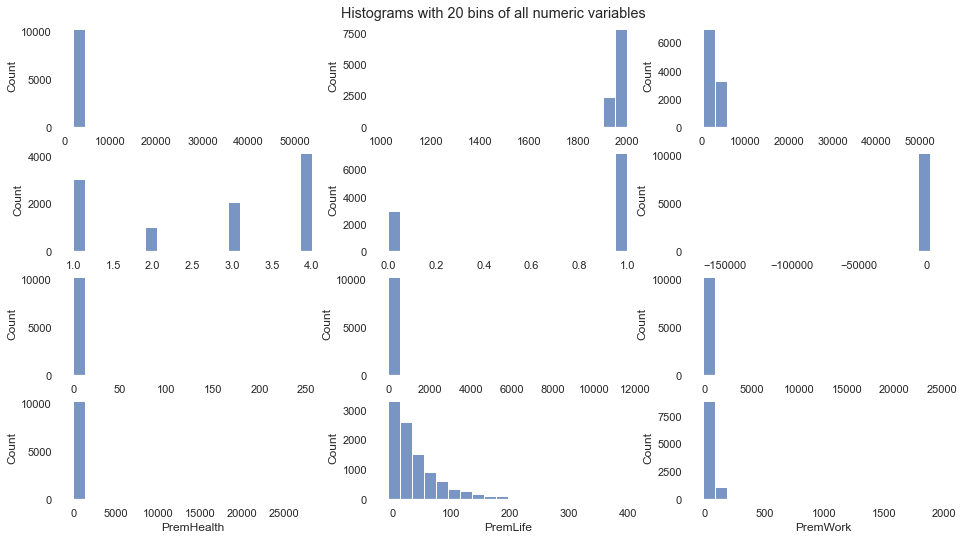

In [9]:
plt_histogram(4,3,df,8)

#### Boxplot

In [10]:
# Function to plot boxplots
def plt_boxplot(rows, columns, dataset,size):
    # Draw de charts
    fig, ax = plt.subplots(rows, columns, figsize=(16,size))
    for var, subplot in zip(dataset[variables], ax.flatten()):
        g = sns.boxplot(data=dataset, x=var, ax=subplot)
        
    # Decoration
    sns.despine()
    plt.rc('axes')
    fig.subplots_adjust(top=.95)
    fig.suptitle("Boxplot of all numeric variables");

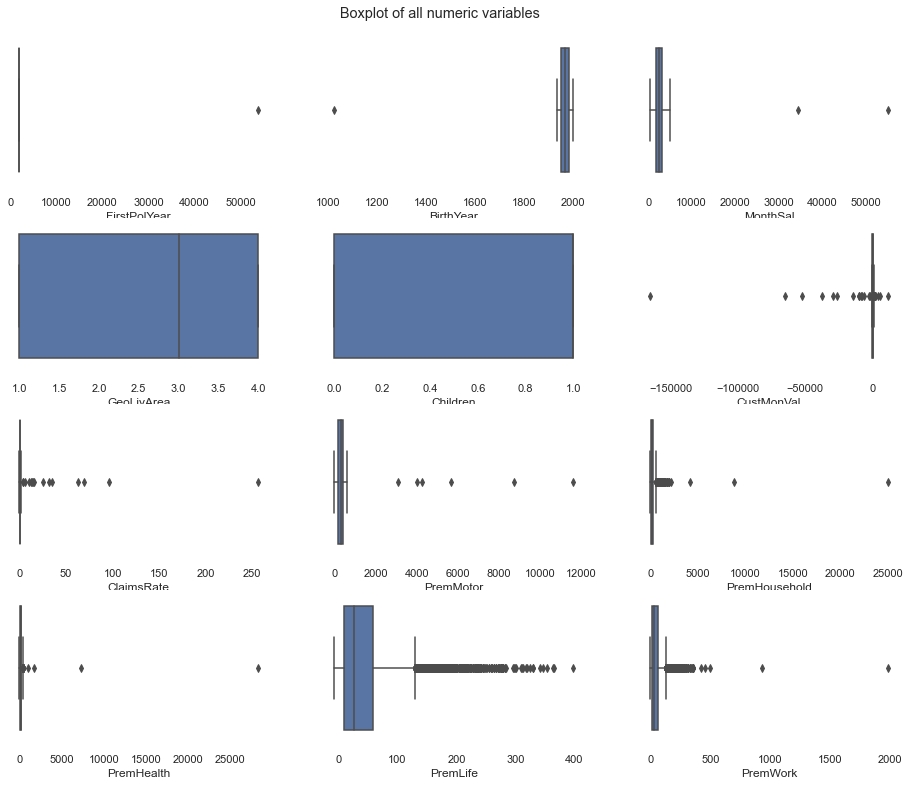

In [11]:
plt_boxplot(4,3, df,12)

#### Correlation

The Spearman Correlation Matrix (figure 4) indicates a strong negative correlation of -0.97 between the claims rate and customer monetary value, meaning that the higher the claim rate is, the lowest is the customer’s value for the company. 
Another interesting correlation is the monthly salary and the year of birth (-0.93 coefficient), indicating that, the older the customers are, the higher are their salaries. This information can be helpful to determine which variables should be kept in the modelling phase.

In [12]:
# Create correlation matrix function
def plt_correlation(dataset):
    corr = dataset[variables].corr(method='spearman')
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True

    # Draw
    fig , ax = plt.subplots(figsize=(10, 18))
    heatmap = sns.heatmap(corr,
                          mask = mask,
                          square = True,
                          linewidths = .5,
                          cmap = 'coolwarm',
                          cbar_kws = {'shrink': .4,
                                    'ticks' : [-1, -.5, 0, 0.5, 1]},
                          fmt='.4f',
                          vmin = -1,
                          vmax = 1,
                          annot = True)

    # Decoration
    plt.title("Spearman correlation between numeric variables")
    ax.set_yticklabels(corr.columns, rotation = 0)
    ax.set_xticklabels(corr.columns, rotation = 45)
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

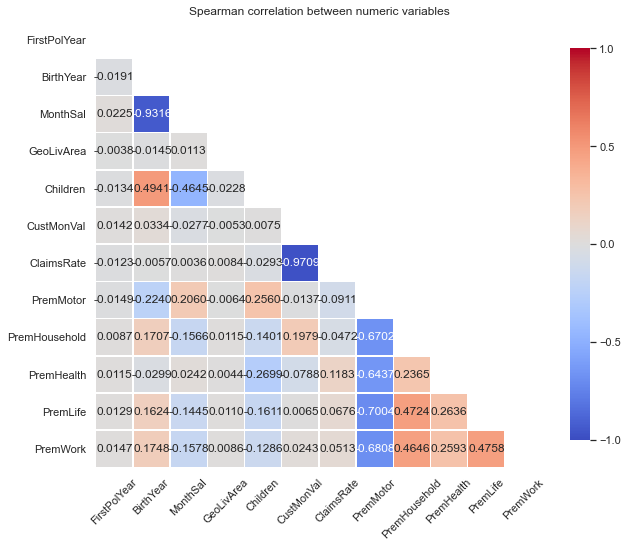

In [13]:
plt_correlation(df)

#### Missing Values

The dataset contains a total of 309 rows with missing values, accounting for 3% of the total observations. Considering the high representativity of the rows with missing values, removing them altogether is not a viable solution as it could impact the results of this project. In order to understand the cause of missing values, a meeting with the stakeholders was carried out. As a result, it was identified that premiums missing values happen when customers have never acquired the type of insurance. For instance, if a household premium is null, it means that the customer does not have a household insurance. The remaining null values were caused by human errors.

In [14]:
print("\nMISSING VALUES BY VARIABLE: \n", df.isnull().sum())
print("\nROWS WITH MISSING VALUES: \n", df.shape[0] - df.dropna().shape[0])

# missing values table
null_date = df[df.isnull().any(axis=1)]

# null values descriptive table
null_date.describe().T


MISSING VALUES BY VARIABLE: 
 CustID             0
FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

ROWS WITH MISSING VALUES: 
 309


,count,mean,std,min,25%,50%,75%,max
CustID,309.0,4992.796117,2910.242276,22.00,2481.000,4851.000,7463.000,10286.00
FirstPolYear,279.0,1985.817204,6.880710,1974.00,1980.000,1986.000,1992.000,1998.00
BirthYear,292.0,1967.575342,15.943774,1937.00,1954.000,1966.500,1980.000,2000.00
MonthSal,273.0,2538.974359,878.855332,517.00,1863.000,2530.000,3200.000,4883.00
GeoLivArea,308.0,2.568182,1.247236,1.00,1.000,3.000,4.000,4.00
Children,288.0,0.750000,0.433766,0.00,0.750,1.000,1.000,1.00
CustMonVal,309.0,180.486537,241.080239,-291.16,-25.000,100.580,386.880,1000.75
ClaimsRate,309.0,0.656828,0.433896,0.00,0.280,0.700,1.000,4.33
PremMotor,275.0,355.884000,139.202318,35.34,257.215,369.290,474.645,568.55
PremHousehold,309.0,127.688188,191.913661,-75.00,0.000,63.900,185.600,1202.45


#### Redundancy

Initially, the redundancy inspection returned zero duplicate rows. However, when the customer id is removed from the analysis, three observations with the exact same values can be identified, as shown on figure 5. It is possible that these customers were added into the system twice by accident. Although their representativity is not significant, cases like these might occur more frequently in the future, and this algorithm must be prepared to handle such situations. For this reason, duplicated rows will be treated.

In [15]:
# filter duplicate rows
df_duplicate_rows = df[df.duplicated()]

# print the number of duplicate rows
print("Number of duplicate rows: ", df_duplicate_rows) 

Number of duplicate rows:  Empty DataFrame
Columns: [CustID, FirstPolYear, BirthYear, EducDeg, MonthSal, GeoLivArea, Children, CustMonVal, ClaimsRate, PremMotor, PremHousehold, PremHealth, PremLife, PremWork]
Index: []


In [16]:
# filter duplicate rows without the Customer Id
df_duplicate_rows_no_id = df[df[['FirstPolYear', 'BirthYear', 'EducDeg', 'MonthSal', 'GeoLivArea', 'Children', 
                                 'CustMonVal', 'ClaimsRate', 'PremMotor', 'PremHousehold', 'PremHealth', 
                                 'PremLife', 'PremWork']].duplicated() == True]

# print the number of duplicate rows
print("Number of duplicate rows (without the customer ID): ", df_duplicate_rows_no_id.shape) 


df_duplicate_rows_no_id.head()

Number of duplicate rows (without the customer ID):  (3, 14)


,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
8013,8014.0,1987.0,1987.0,b'2 - High School',1912.0,4.0,1.0,290.61,0.58,202.37,177.25,306.39,63.90,-0.11
8121,8122.0,1977.0,1974.0,b'2 - High School',2204.0,4.0,1.0,-22.11,1.00,214.93,88.90,266.94,39.23,42.12
9553,9554.0,1986.0,1952.0,b'2 - High School',3900.0,4.0,0.0,-119.35,1.10,163.03,481.75,224.82,94.35,18.56


In [17]:
check_CustID = df.loc[(df['CustMonVal'] == 290.61) & (df['PremMotor'] == 202.37)]
check_CustID.head()

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
2099,2100.0,1987.0,1987.0,b'2 - High School',1912.0,4.0,1.0,290.61,0.58,202.37,177.25,306.39,63.9,-0.11
8013,8014.0,1987.0,1987.0,b'2 - High School',1912.0,4.0,1.0,290.61,0.58,202.37,177.25,306.39,63.9,-0.11


#### Categorical Variable Analysis (Cardinality)

In [18]:
# count categorical variable "EducDeg" to check its cardinality
df.groupby('EducDeg').count()

,CustID,FirstPolYear,BirthYear,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
EducDeg,,,,,,,,,,,,,
b'1 - Basic',1272,1270,1270,1266,1272,1268,1272,1272,1268,1272,1267,1267,1264
b'2 - High School',3510,3506,3500,3502,3510,3503,3510,3510,3503,3510,3495,3487,3492
b'3 - BSc/MSc',4799,4793,4796,4779,4799,4791,4799,4799,4779,4799,4781,4734,4749
b'4 - PhD',698,695,696,697,697,696,698,698,695,698,694,687,689


#### Errors and Incorrect Values

Two types of incorrect issues were found in the dataset. Firstly, there is one row in the dataset where the FirstPolYear is greater than 2016. Secondly, there were 1997 rows where the FirstPolYear is greater than the BirthYear. According to the stakeholders, this happened as a result of human errors, where the years were swapped when added into the system.

In [19]:
# check if there are first policy year higher than 2016
check_firstpolyear = df[(df['FirstPolYear'] > 2016)]
print("\nFirst Policy year higher than 2016:", check_firstpolyear.shape)
check_firstpolyear.head()


First Policy year higher than 2016: (1, 14)


,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
9294,9295.0,53784.0,1948.0,b'3 - BSc/MSc',3268.0,1.0,0.0,348.85,0.37,351.4,15.0,187.37,22.45,17.78


In [20]:
# check if birth year is higher than the first policy year
check_birthyear = df[(df['BirthYear'] > df['FirstPolYear'])]
print("\nFirst policy year higher than the birth year (rowns/columns):", check_birthyear.shape)
check_birthyear.head()


First policy year higher than the birth year (rowns/columns): (1997, 14)


,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
13,14.0,1983.0,2000.0,b'1 - Basic',1043.0,3.0,1.0,-75.12,1.06,44.34,342.85,127.69,267.94,94.46
18,19.0,1981.0,1982.0,b'1 - Basic',1414.0,3.0,1.0,230.38,0.71,313.17,373.40,121.80,14.78,72.57
22,23.0,1976.0,1986.0,b'2 - High School',1495.0,1.0,1.0,-89.79,1.08,209.04,308.95,192.48,64.79,54.90
40,41.0,1994.0,1995.0,b'2 - High School',1177.0,4.0,1.0,121.36,0.84,52.01,455.65,135.47,146.36,148.03


In [21]:
# check if there are rows where all premiums are null
check_premiums = df[df.PremMotor.isnull() & df.PremHousehold.isnull() & df.PremHealth.isnull() &
                   df.PremLife.isnull() & df.PremWork.isnull()]
print("\nRows with all premiums equal to null:", check_premiums.shape)
check_premiums.head()


Rows with all premiums equal to null: (0, 14)


,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork


#### Outliers

As seen on the histograms, all columns, except GeoLivArea and Children, contain severe outliers. Some of the outliers seen in the graphs could fall away once the data is cleaned, however, not all outliers might disappear after this process. If one should find that there are still outliers after cleaning the data, it might have to consider grouping the outliers and put them in a cluster of their own.


### 3.3 Data Quality Verification

Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data quality measures the condition of a dataset to serve its specific purpose based on factors such as accuracy, integrity, completeness, consistency, validity, among others. The data quality assessment is one of the most important steps of any data science project, as poor-data quality could lead to wrong decisions causing lost sales opportunities, for example.

Although there are some data quality issues that need to be addressed as seen in the summary above, the dataset does not include any serious data quality issues that would result in not being able to continue to try and achieve the recommended goals and plans. Based on the detailed analysis of the variables above, it is possible to say that the quality of the dataset provided by the stakeholders is relatively good, since there are no significant structural issues in it. Nevertheless, a proper data preparation plan will need to be established to deal with outliers and possible errors on the dataset.

## 4. Data Preparation

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis and includes removing columns that will not be needed, check missing values, and change the format of the variables when applicable. Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Data preprocessing is a proven method of resolving such issues.

In [22]:
# Create a modeling dataset from the original dataset
X = df.copy(deep=True)

### 4.1 Data Selection

Due to the purpose of our study, the following variables were selected for this study: FirstPolYear, BirthYear, EducDeg, MonthSal, GeoLivArea, Children, CustMonVal, ClaimsRate, all Premium’s. These variables were selected because they describe customers characteristics or behaviour and can provide valuable insights to the analysis.


### 3.2 Cleaning Data

#### Missing Values

Considering the representativity of rows with missing values (3%), two strategies were applied to treat these observations. Firstly, a zero value was assigned to all premium variables with missing values, indicating that the customer has never acquired that type of insurance. These observations represent 2.6% of the dataset. Secondly, when analysing the remaining missing values, it was identified that they represent only 0.89% of the data. In that case, they were removed from the analysis. So, now the dataset contains 10,204 observations.

In [23]:
# If Premiums are missing, then their values are equal to 0
cols = ["PremMotor","PremHealth","PremLife","PremWork"]
X[cols] = X[cols].replace({np.nan:0, np.nan:0})

# Check missing values
print("\nMISSING VALUES BY VARIABLE:\n", X.isnull().sum())


MISSING VALUES BY VARIABLE:
 CustID            0
FirstPolYear     30
BirthYear        17
EducDeg          17
MonthSal         36
GeoLivArea        1
Children         21
CustMonVal        0
ClaimsRate        0
PremMotor         0
PremHousehold     0
PremHealth        0
PremLife          0
PremWork          0
dtype: int64


In [24]:
# Check missing values
X.dropna(inplace=True)
print("\nMISSING VALUES BY VARIABLE:\n", X.isnull().sum())
X.shape


MISSING VALUES BY VARIABLE:
 CustID           0
FirstPolYear     0
BirthYear        0
EducDeg          0
MonthSal         0
GeoLivArea       0
Children         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
dtype: int64


(10204, 14)

#### Redundancy

Since there are only three pairs of possible duplicate rows, one duplicate from each pair was removed from the dataset.

In [25]:
# Removing duplicated rows
X = X[~(X['CustID'] == 8014)]
X = X[~(X['CustID'] == 8122)]
X = X[~(X['CustID'] == 9554)]

X.shape

(10201, 14)

#### Errors and Incorrect Values

To treat errors and incorrect values, the following decisions were made:
- Birth year cannot be higher than the first-year policy
- FirstPolYear: remove if the value is greater than 50,000
- Year of Birth: remove if the value is less than 1,200
- MonthSal: remove if the value is greater than 6,000
- CustMonVal: remove if the value is less than -2,000 and greater than 2,000
- ClaimsRate: remove if the value is greater than 2
- PremMotor: remove if the value is greater than 2,000
- PremHouseHold: remove if the value is greater than 4,000
- PremHealth: remove if value is greater than 20,000

In total, thirty-two observations were lost in this step. The cumulative lost observations account for 1.23% of the initial observations. The database is left with 10,169 observations.

In [26]:
# Birth year cannot be higher than the first year policy
date_validation = X.loc[X.FirstPolYear < X.BirthYear]
print(date_validation.shape)
date_validation.head()

(1982, 14)


,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
1,2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
13,14.0,1983.0,2000.0,b'1 - Basic',1043.0,3.0,1.0,-75.12,1.06,44.34,342.85,127.69,267.94,94.46
18,19.0,1981.0,1982.0,b'1 - Basic',1414.0,3.0,1.0,230.38,0.71,313.17,373.40,121.80,14.78,72.57
22,23.0,1976.0,1986.0,b'2 - High School',1495.0,1.0,1.0,-89.79,1.08,209.04,308.95,192.48,64.79,54.90
40,41.0,1994.0,1995.0,b'2 - High School',1177.0,4.0,1.0,121.36,0.84,52.01,455.65,135.47,146.36,148.03


In [27]:
# create a temporary column to store the birth year and the first year policy
X["BirthYear_tmp"] = X["BirthYear"]
X["FirstPolYear_tmp"] = X["FirstPolYear"]

# find birth years higher than the first year policy and change the values
X.loc[X.FirstPolYear_tmp < X.BirthYear_tmp, 'BirthYear'] = X["FirstPolYear_tmp"]
X.loc[X.FirstPolYear_tmp < X.BirthYear_tmp, 'FirstPolYear'] = X["BirthYear_tmp"]

# validation
date_validation = X.loc[X.FirstPolYear < X.BirthYear]
date_validation.shape

# remove temporary columns
X.drop(columns='BirthYear_tmp', inplace=True)
X.drop(columns='FirstPolYear_tmp', inplace=True)

# check row
X.loc[X.CustID == 2]

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
1,2.0,1995.0,1981.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.2,116.69,194.48,106.13


In [28]:
X.shape

(10201, 14)

In [29]:
# Remove FirstPolYear if value is greater than 50,000
X = X[~(X['FirstPolYear'] > 50000)]

# Remove BirthYear if value is less than 1,200
X = X[~(X['BirthYear'] < 1200)]

# Remove MonthSal if value is greater than 6,000
X = X[~(X['MonthSal'] > 6000)]

# Remove CustMonVal if value is less than -1,000 and higher than 2,000
X = X[~(X['CustMonVal'] < -1000)]
X = X[~(X['CustMonVal'] > 2000)]

# Remove ClaimsRate if value is greater than 2
X = X[~(X['ClaimsRate'] > 2)]

# Remove PremMotor if value is greater than 2000
X = X[~(X['PremMotor'] > 2000)]

# Remove PremWork if value is greater than 500
X = X[~(X['PremWork'] > 500)]

# Remove PremWork if value is greater than 4,000
X = X[~(X['PremHousehold'] > 4000)]

# Remove Premhealth if value is greater than 20,000
X = X[~(X['PremHealth'] > 20000)]

X.shape

(10169, 14)

#### Visualisation of the data after the cleaning process


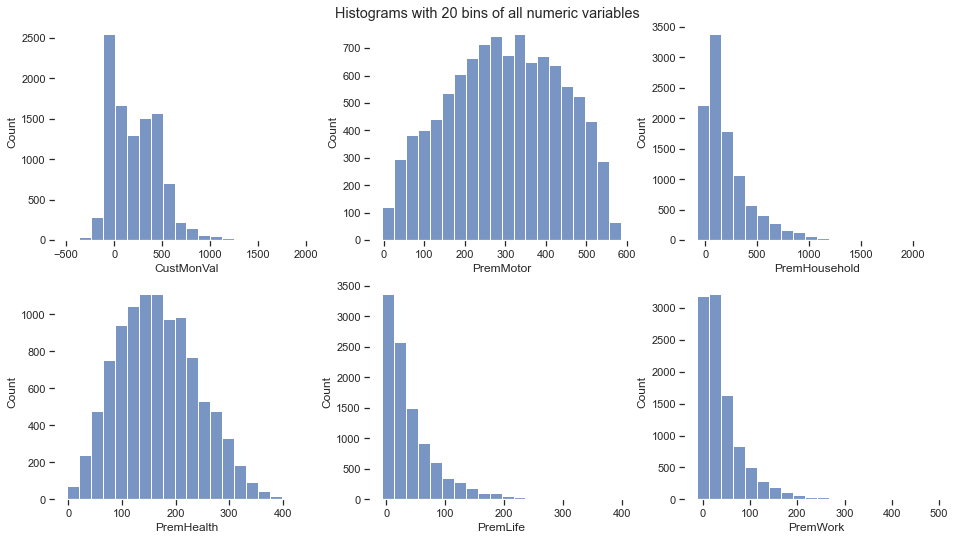

In [30]:
# identify all numeric variables in the dataset
variables=['CustMonVal', 'PremMotor', 'PremHousehold', 'PremHealth', 'PremLife', 'PremWork']

# identify all numeric variables in the dataset
plt_histogram(2,3,X,8)

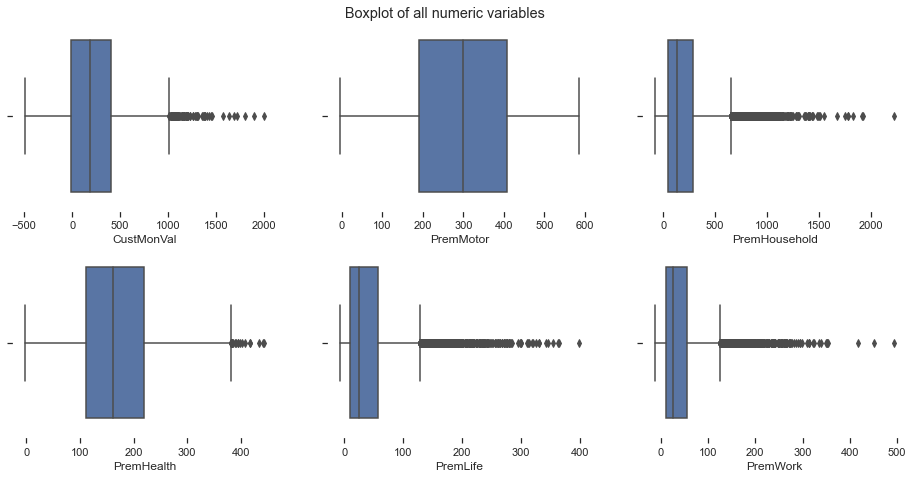

In [31]:
plt_boxplot(2,3,X,7)

In [32]:
X.shape

(10169, 14)

### 4.3 Data Construction

Since not much value can be derived from the BirthYear variable as it is in the dataset, it was therefore decided to construct a new variable called ‘CustomerAge’. This is a categorical variable and its values were binned prior to the modelling phase, as follows: 0-17, 18-24, 25-34, 35-44, 45-54, 55-64, 65+.

In [33]:
# calculate the age of the customer to facilitate the analysis
X["CustAge"] = 2016 - X["BirthYear"]

# Bin the age
X['AgeBins'] = pd.cut(x=X['CustAge'], bins=[0, 17, 24, 34, 44, 54,64,99], 
                      labels=['0-17','18-24','25-34','35-44','45-54','55-64','+65'])
# check if bins are correct
X

,CustID,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork,CustAge,AgeBins
0,1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89,34.0,25-34
1,2.0,1995.0,1981.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13,35.0,35-44
2,3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02,46.0,45-54
3,4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34,35.0,35-44
4,5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45,43.0,35-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10291,10292.0,1984.0,1949.0,b'4 - PhD',3188.0,2.0,0.0,-0.11,0.96,393.74,49.45,173.81,9.78,14.78,67.0,+65
10292,10293.0,1977.0,1952.0,b'1 - Basic',2431.0,3.0,0.0,1405.60,0.00,133.58,1035.75,143.25,12.89,105.13,64.0,55-64
10293,10294.0,1994.0,1976.0,b'3 - BSc/MSc',2918.0,1.0,1.0,524.10,0.21,403.63,132.80,142.25,12.67,4.89,40.0,35-44
10294,10295.0,1981.0,1977.0,b'1 - Basic',1971.0,2.0,1.0,250.05,0.65,188.59,211.15,198.37,63.90,112.91,39.0,35-44


### 4.4 Data Formatting

Machine learning models require all input and output variables to be numeric. In this project, only one categorical variable is formatted as such, EducDeg, meaning that it must be encoded prior to the modelling phase. In addition, the variables GeoLivArea and the age bins are also categorical but present only numeric values. Considering that k-means is a distance based algorithm, these variables were encoded as well. The method chosen for treating these variables was the one hot encoding, that is a representation of categorical variables as binary vectors

#### Encoding Categorical Data

All categorical variables - academic degree, geographical area, and age, were encoded because k-means uses distance-based measurements to determine the similarity between data points.

In [34]:
# Encode categorical variables to dummy variables
cols = ['EducDeg', 'GeoLivArea', 'AgeBins']
ce_one_hot = ce.OneHotEncoder(cols = cols, use_cat_names=True)
X = ce_one_hot.fit_transform(X)

In [35]:
def one_hot(s, threshold,prefix):
    # Check dummies for the column
    d = pd.get_dummies(s)

    # Check if percentage is below threshold and act accordingly
    f = pd.value_counts(s, sort=False, normalize=True) < threshold
    if f.sum() == 0:
        newSeries=d
    else:
        newSeries=d.loc[:, ~f].join(d.loc[:, f].sum(1).rename('Other'))
    # Add the prefix and return the result    
    newSeries=newSeries.add_prefix(prefix)
    return newSeries

In [36]:
# check if variables were encoded correctly
X.head()

,CustID,FirstPolYear,BirthYear,EducDeg_b'2 - High School',EducDeg_b'1 - Basic',EducDeg_b'3 - BSc/MSc',EducDeg_b'4 - PhD',MonthSal,GeoLivArea_1.0,GeoLivArea_4.0,...,PremHealth,PremLife,PremWork,CustAge,AgeBins_18-24,AgeBins_25-34,AgeBins_35-44,AgeBins_45-54,AgeBins_55-64,AgeBins_+65
0,1.0,1985.0,1982.0,1,0,0,0,2177.0,1,0,...,146.36,47.01,16.89,34.0,0,1,0,0,0,0
1,2.0,1995.0,1981.0,1,0,0,0,677.0,0,1,...,116.69,194.48,106.13,35.0,0,0,1,0,0,0
2,3.0,1991.0,1970.0,0,1,0,0,2277.0,0,0,...,124.58,86.35,99.02,46.0,0,0,0,1,0,0
3,4.0,1990.0,1981.0,0,0,1,0,1099.0,0,1,...,311.17,35.34,28.34,35.0,0,0,1,0,0,0
4,5.0,1986.0,1973.0,0,0,1,0,1763.0,0,1,...,182.59,18.78,41.45,43.0,0,0,1,0,0,0


In [37]:
# check if variables were encoded correctly
X.tail()

,CustID,FirstPolYear,BirthYear,EducDeg_b'2 - High School',EducDeg_b'1 - Basic',EducDeg_b'3 - BSc/MSc',EducDeg_b'4 - PhD',MonthSal,GeoLivArea_1.0,GeoLivArea_4.0,...,PremHealth,PremLife,PremWork,CustAge,AgeBins_18-24,AgeBins_25-34,AgeBins_35-44,AgeBins_45-54,AgeBins_55-64,AgeBins_+65
10291,10292.0,1984.0,1949.0,0,0,0,1,3188.0,0,0,...,173.81,9.78,14.78,67.0,0,0,0,0,0,1
10292,10293.0,1977.0,1952.0,0,1,0,0,2431.0,0,0,...,143.25,12.89,105.13,64.0,0,0,0,0,1,0
10293,10294.0,1994.0,1976.0,0,0,1,0,2918.0,1,0,...,142.25,12.67,4.89,40.0,0,0,1,0,0,0
10294,10295.0,1981.0,1977.0,0,1,0,0,1971.0,0,0,...,198.37,63.90,112.91,39.0,0,0,1,0,0,0
10295,10296.0,1990.0,1981.0,0,0,0,1,2815.0,1,0,...,141.25,6.89,12.89,35.0,0,0,1,0,0,0


### 4.5 Remove Data

For this project, there are certain variables that will not be used in the analysis, either because they have a high correlation with another variable, or because they don’t represent customer's characteristics or behavior. Therefore, the following variables were excluded: CustID, BirthYear, FirstPolYear, CustAge, ClaimsRate.

In [38]:
# Remove columns that will not be used in the analysis as they do not represent customer's characteristics or behavior
cols = ['CustID', 'BirthYear', 'FirstPolYear', 'CustAge','ClaimsRate']
X.drop(cols, axis=1, inplace=True)

In [39]:
X.isnull().sum()

EducDeg_b'2 - High School'    0
EducDeg_b'1 - Basic'          0
EducDeg_b'3 - BSc/MSc'        0
EducDeg_b'4 - PhD'            0
MonthSal                      0
GeoLivArea_1.0                0
GeoLivArea_4.0                0
GeoLivArea_3.0                0
GeoLivArea_2.0                0
Children                      0
CustMonVal                    0
PremMotor                     0
PremHousehold                 0
PremHealth                    0
PremLife                      0
PremWork                      0
AgeBins_18-24                 0
AgeBins_25-34                 0
AgeBins_35-44                 0
AgeBins_45-54                 0
AgeBins_55-64                 0
AgeBins_+65                   0
dtype: int64

In [40]:
X.describe()

,EducDeg_b'2 - High School',EducDeg_b'1 - Basic',EducDeg_b'3 - BSc/MSc',EducDeg_b'4 - PhD',MonthSal,GeoLivArea_1.0,GeoLivArea_4.0,GeoLivArea_3.0,GeoLivArea_2.0,Children,...,PremHousehold,PremHealth,PremLife,PremWork,AgeBins_18-24,AgeBins_25-34,AgeBins_35-44,AgeBins_45-54,AgeBins_55-64,AgeBins_+65
count,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,...,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000,10169.000000
mean,0.341331,0.123709,0.467008,0.067952,2497.157636,0.296391,0.403678,0.200905,0.099026,0.706854,...,207.300079,167.295619,41.470144,40.655916,0.028321,0.160684,0.252631,0.169732,0.169928,0.218704
std,0.474180,0.329266,0.498935,0.251675,984.628268,0.456688,0.490658,0.400697,0.298712,0.455227,...,236.016069,74.781141,47.525159,46.907185,0.165897,0.367258,0.434542,0.375415,0.375588,0.413388
min,0.000000,0.000000,0.000000,0.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-75.000000,-2.110000,-7.000000,-12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1705.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,49.450000,111.020000,9.890000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,2499.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,133.350000,162.030000,25.450000,25.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,3290.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,290.600000,218.930000,57.010000,56.010000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,5021.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2223.750000,442.860000,398.300000,494.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4.6 Outliers Preparation

After the cleaning of the data, it can be seen on the boxplot below (figure 6) that there are quite a few outliers left in the household, health, work, and life premiums variables even after data cleaning. Because of these outliers that persist, it was decided to cluster these outliers and put them separately from the rest of the data. As a result, two datasets were created. The dataset X contains 8,840 observations without any outliers, while the dataset Y contains 1,329 observations with the outliers observed on the variables customer monetary value, premium household, premium health, premium life, and premium work.

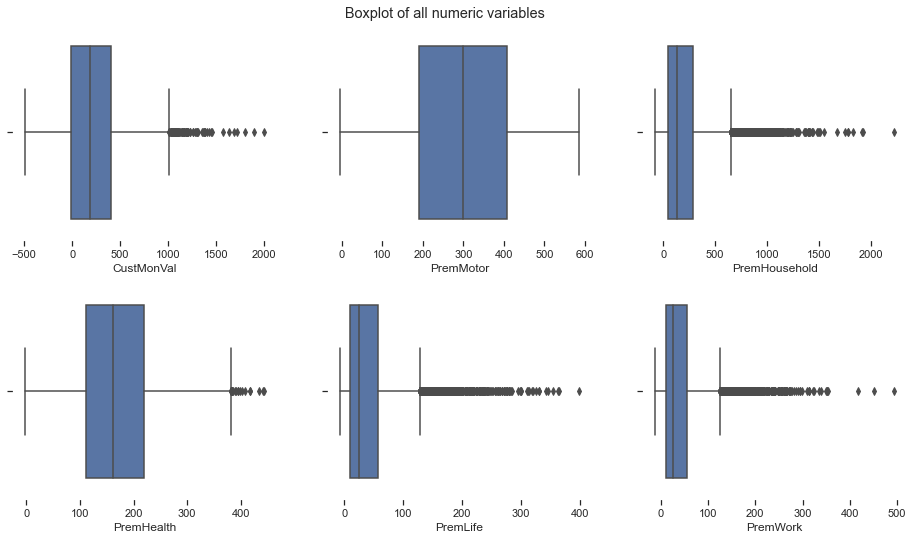

In [41]:
plt_boxplot(2,3,X,8)

In [42]:
X_all = X.copy(deep=True)
X_all.shape

(10169, 22)

(8592, 22)


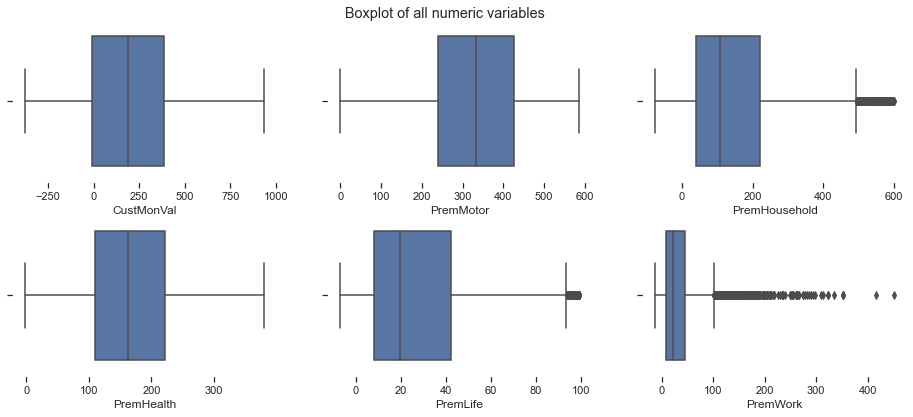

In [43]:
# Create a dataset for non-outliers observations 
X = X_all.loc[(X_all['CustMonVal'] <= 1000) 
              & (X_all['PremHousehold'] <= 600) 
              & (X_all['PremHealth'] <= 380)
              & (X_all['PremLife'] <= 100)]

print(X.shape)
plt_boxplot(2,3,X,6)

In [44]:
# Create a dataset for outliers only 
Y = X_all.loc[(X_all['CustMonVal'] > 1000) 
              | (X_all['PremHousehold'] > 600) 
              | (X_all['PremHealth'] > 380)
              | (X_all['PremLife'] > 120)]

print(Y.shape)

(1329, 22)


### 4.7 Data Normalization

The preprocessed data contains attributes with a mixture of scales for various quantities such as salary and premiums. Most machine learning algorithms, like k-means, expect or are more effective if the data attributes have the same scale. With that said, the preprocessed dataset was normalized using the min max scaler technique, which refers to rescaling real valued numeric attributes into the range 0 and 1.

In [45]:
# Get a copy of the dataframe before normalization for results' analysis
X_beforeNorm = X.copy(deep=True)
Y_beforeNorm = Y.copy(deep=True)

In [46]:
# Normalize all columns
# MinMax scaler returns an array, so the dataframe must be recreated
X_all = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X_all.values), 
                 columns=X_all.columns,index=X_all.index)

# X = dataset without outliers
X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(X.values), 
                 columns=X.columns,index=X.index)

# Y = dataset with outliers only
Y = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(Y.values), 
                 columns=Y.columns,index=Y.index)

## 5. Modelling

### 5.1 Principal Component Analysis

Principal Component Analysis (PCA) is a statistical procedure that can be considered as a projection method to conserve the maximum amount of information from the initial dimensions. This technique is usually used for dimensionality reduction, but it can also be used to visualize data, observe trends, clusters and outliers (Tam, Adrian, 2021). This method helps to understand the correlation between the variables and observations and if all variables are indeed relevant for the analysis. A PCA was applied to each of the datasets (with and without outliers) in order to reduce the dimensionality of the dataset, while retaining as much variance in data as possible.

Below is a visualization of the scatter plots of the first two principal components by the “customer monetary value”. These graphical displays offer a good partial approximation to the systematic information contained in the data. The plots show that both datasets, without outliers and with outliers only, present a similar pattern, however, it is important to note that scatter plots only take into account two dimensions, which gives a limited view of the multivariate phenomenon. 


(8592, 2)
(1329, 2)


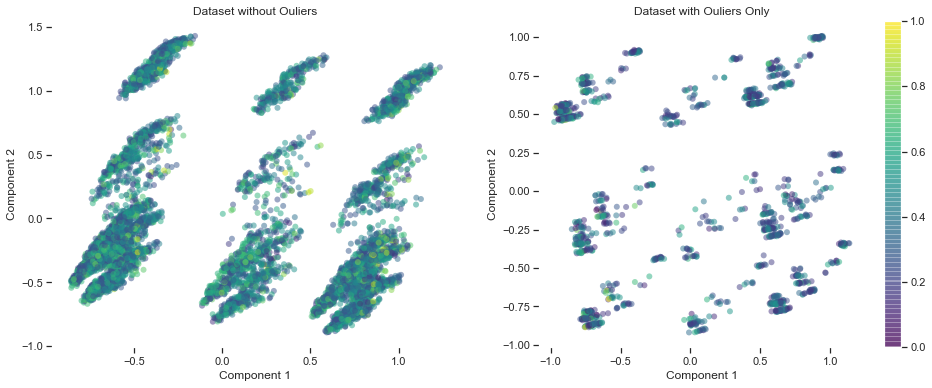

In [47]:
# PCA to visualize the first two principal components for X
pcaX = PCA(n_components = 2)
pcaX.fit(X)
X_pcaX = pcaX.transform(X)
print(X_pcaX.shape)

# PCA to visualize the first two principal components for Y
pcaY = PCA(n_components = 2)
pcaY.fit(Y)
X_pcaY = pcaY.transform(Y)
print(X_pcaY.shape)

# Scatter plot of the two Principal Components by the "customer monetary value"
fig, ax=plt.subplots(1, 2, figsize=(16,6))

# dataset X
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(X_pcaX[:, 0], X_pcaX[:, 1], c=X.CustMonVal, edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Dataset without Ouliers')

# dataset Y
plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.scatter(X_pcaY[:, 0], X_pcaY[:, 1], c=Y.CustMonVal, edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Dataset with Ouliers Only')
plt.colorbar();

In [48]:
# display the PCA and its cumulative variance explained for X
pcaX = PCA().fit(X)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pcaX.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(X.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pcaX.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.162827,0.162827
1,2,0.154625,0.317452
2,3,0.134974,0.452426
3,4,0.093267,0.545694
4,5,0.090389,0.636082
5,6,0.076468,0.712550
6,7,0.063889,0.776440
7,8,0.049749,0.826189
8,9,0.046344,0.872533
9,10,0.036202,0.908734


In [49]:
# display the PCA and its cumulative variance explained for Y
pcaY = PCA().fit(Y)

# Show the variance per component
pcaevr = ['{:f}'.format(item) for item in pcaY.explained_variance_ratio_]
pcaDF = pd.DataFrame({'Component': range(1, len(Y.columns)+1),
                      'Variance explained': pcaevr,
                      'Cumulative variance explained': np.cumsum(pcaY.explained_variance_ratio_)})
pcaDF

,Component,Variance explained,Cumulative variance explained
0,1,0.182462,0.182462
1,2,0.142607,0.325069
2,3,0.132609,0.457678
3,4,0.112842,0.570520
4,5,0.093009,0.663529
5,6,0.072768,0.736298
6,7,0.064094,0.800392
7,8,0.050193,0.850585
8,9,0.041322,0.891908
9,10,0.035768,0.927675


In terms of dimensionality reduction of the database without outliers, the graph below (figure 8) shows the cumulative percentage of the variation accounted for by each principal component. The ideal curve of a cumulative variance explained plot should be steep, bending at an “elbow” and flattening out after that. The elbow indicates the cutting-off point, which in this case indicates that just the principal components 1 to 10 are enough to describe the data. Similarly, the dataset with only outliers presented a cutting-off point around the tenth component. Thus, it is plausible to retain 10 principle components for both datasets, which explains 90.8% and 92.8% of the cumulative variance explained respectively.

Text(0.5, 1.0, 'Explained variance by components of Y')

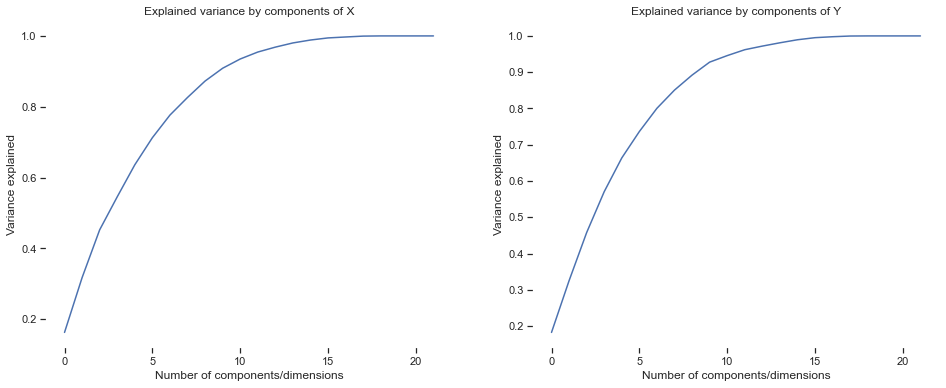

In [50]:
# Draw
fig, ax=plt.subplots(1, 2, figsize=(16,6))

# Plot the cumulative explained variance for X
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(np.cumsum(pcaX.explained_variance_ratio_))
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance explained')
plt.title('Explained variance by components of X')

# Plot the cumulative explained variance for Y
plt.subplot(1, 2, 2) # row 1, col 2 index 2
plt.plot(np.cumsum(pcaY.explained_variance_ratio_))
plt.xlabel('Number of components/dimensions')
plt.ylabel('Variance explained')
plt.title('Explained variance by components of Y')

### 5.2 K-Means

K-means is a hard partitioning algorithm, meaning that each data point falls into only one partition. According to Garbade, Dr. Michael J (2018), the algorithm identifies k numbers of centroids, being k a number defined by the researcher, and then it allocates every data point to the nearest cluster, while keeping the centroids as small as possible. One of the advantages of this method is that it is simple to implement, and it scales to large datasets. On the other hand, it requires domain knowledge to define k (number of clusters). 


In [51]:
# Apply the dimension reduction to the dataset (for 10 components) for X
pca_reducedX = PCA(n_components = 10)
pca_reducedX.fit(X)
X_pca_reduced = pca_reducedX.transform(X) 
print(X_pca_reduced.shape)

# Apply the dimension reduction to the dataset (for 10 components) for Y
pca_reducedY = PCA(n_components = 10)
pca_reducedY.fit(Y)
Y_pca_reduced = pca_reducedY.transform(Y) 
print(Y_pca_reduced.shape)

(8592, 10)
(1329, 10)


#### Elbow Method

 A range of 1 to 20 was chosen to determine the number of clusters (k) and the within-cluster sum of squares (WCSS) was computed. The number of clusters (k) should be selected where there is a curve in the graph, as it indicates that from there the WCSS stops rapidly decreasing. It is expected that the plot looks like an arm with a clear elbow. Unfortunately, one does not always have such clearly clustered data. This means that the elbow may not be clear and sharp, as it can be observed on figure 9. In such an ambiguous case, the Silhouette Method can be a more appropriate method.


In [52]:
# Select K based on the sum of squared distances - Elbow method for X
ssd = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k, random_state=123)
    km = km.fit(X_pca_reduced)
    ssd.append(km.inertia_)
    
# Select K based on the sum of squared distances - Elbow method for Y
ssdY = []
KY = range(1,20)
for k in KY:
    kmY = KMeans(n_clusters=k, random_state=123)
    kmY = kmY.fit(Y_pca_reduced)
    ssdY.append(kmY.inertia_)

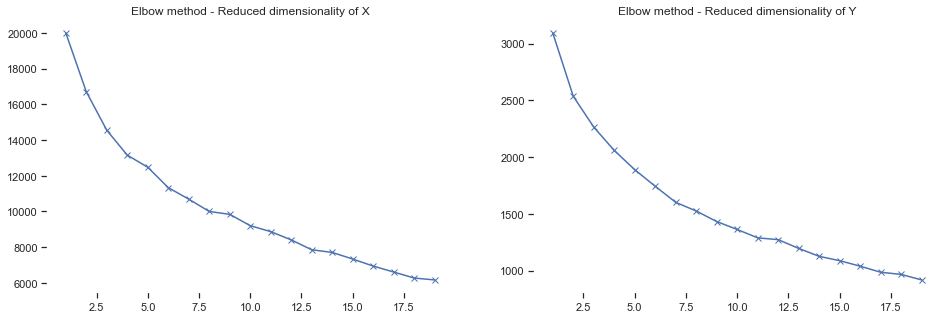

In [53]:
# Show Results
# Draw
fig, ax=plt.subplots(figsize=(16,5))

# Plot the cumulative explained variance for X
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(K, ssd, 'bx-')
plt.title('Elbow method - Reduced dimensionality of X');

# Plot the cumulative explained variance for Y
plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.plot(KY, ssdY, 'bx-')
plt.title('Elbow method - Reduced dimensionality of Y');

#### Silhouette Method

This method measures how similar a data point is to its own cluster (cohesion) compared to other clusters (separation). Because dissimilarity can only be measured in more than 1 partition, a range for k of 2 to 20 was chosen and k-means was applied for each one. One can observe that, on the left graph is reaching a high value for k = 4, indicating that the optimal number of clusters for the dataset without outliers is 4. The same process was applied with the dataset with outliers only, where it can be observed that, where k=3, there is the first value in growth, indicating that this is a reasonable number of clusters and it is aligned with the business success criteria. It should be remembered that the choice of the number of clusters is very subjective and depends on each analyst’s interpretation, which is one of the disadvantages of this method.

In [54]:
# Select K based on the Silhouette method for X
sil = []
# Dissimilarity can only be measured in more than 1 partition, therefore it starts on K=2
for k in range(2, 20):
  km = KMeans(n_clusters = k, random_state=123).fit(X)
  labels = km.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))


# Select K based on the Silhouette method for Y
silY = []
# Dissimilarity can only be measured in more than 1 partition, therefore it starts on K=2
for k in range(2, 20):
  kmY = KMeans(n_clusters = k, random_state=123).fit(Y)
  labels = kmY.labels_
  silY.append(silhouette_score(Y, labels, metric = 'euclidean'))

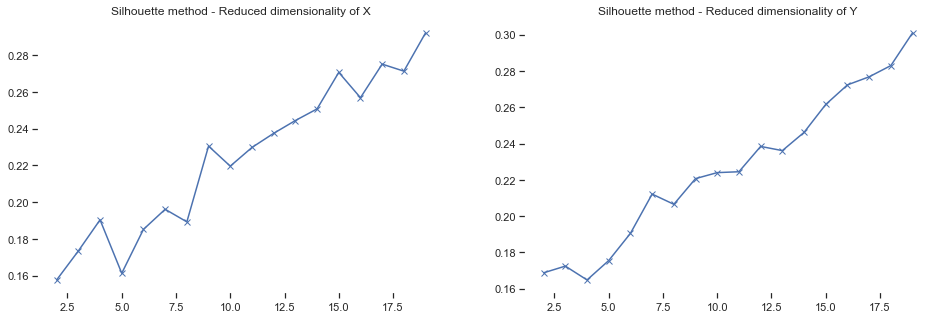

In [55]:
# Show Results
fig, ax=plt.subplots(figsize=(16,5))

# Draw X
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.plot(range(2, 20), sil, 'bx-')
plt.title('Silhouette method - Reduced dimensionality of X');

# Draw Y
plt.subplot(1, 2, 2) # row 1, col 2 index 1
plt.plot(range(2, 20), silY, 'bx-')
plt.title('Silhouette method - Reduced dimensionality of Y');

In addition to the silhouette and elbow methods, the cardinality and magnitude of each dataset must be analysed in order to confirm that the decision about the number of clusters is as accurate as possible. A higher cardinality tends to result in a higher magnitude. Clusters are anomalous when cardinality does not correlate with magnitude. As it can be seen for the dataset with outliers only the clusters seem to be less correlated with the magnitude.


In [56]:
# Apply the K-Means for K=5 for X
K=4
kmeans = KMeans(n_clusters=K, random_state=123)
allDistances = kmeans.fit_transform(X_pca_reduced)
x_kmeans = kmeans.predict(X_pca_reduced)

# Apply the K-Means for K=3 for Y
KY=3
kmeansY = KMeans(n_clusters=KY, random_state=123)
allDistancesY = kmeansY.fit_transform(Y_pca_reduced)
y_kmeans = kmeansY.predict(Y_pca_reduced)

Once the number of clusters is chosen and analysed, the scatterplot of the principal components is plotted by cluster to see if there are any distinctive patterns. The grey circles represent each centroid and each cluster is represented in a different colour. As one can observe, the plot is not very homogeneous as the green and yellow clusters are mixed together. As mentioned before, since the scatter plot takes into account two dimensions only, it gives a limited view of the multivariate phenomenon.


Text(0, 0.5, 'Frequency in cluster of Y')

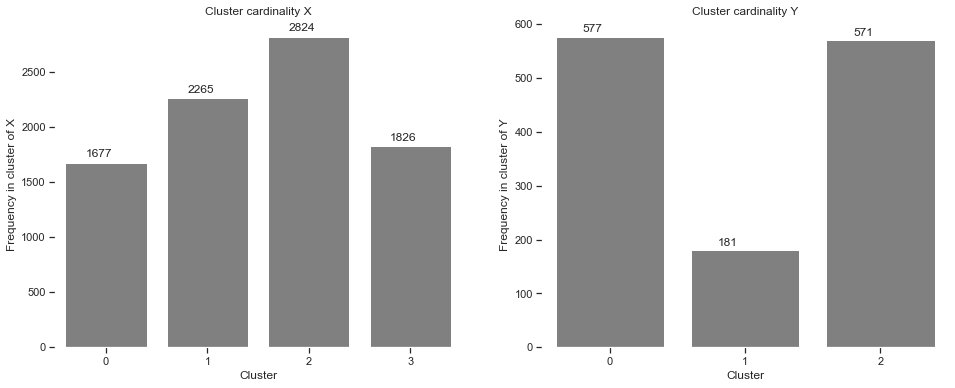

In [57]:
# Plot clusters cardinality 

# Count observations per cluster
freqByCluster = X_beforeNorm.groupby(x_kmeans).size()
freqByClusterY = Y_beforeNorm.groupby(y_kmeans).size()

fig, ax=plt.subplots(1,2,figsize=(16,6))

# Draw X
plt.subplot(1, 2, 1) # row 1, col 2 index 1
g = sns.countplot(x=x_kmeans, color='grey')
for index,data in enumerate(freqByCluster):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data}")
plt.title("Cluster cardinality X")
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster of X")

# Draw Y
plt.subplot(1, 2, 2) # row 1, col 2 index 2
g = sns.countplot(x=y_kmeans, color='grey')
for index,data in enumerate(freqByClusterY):
    plt.text(x=index-0.2 , y=data+8 , s=f"{data}")
plt.title("Cluster cardinality Y")
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster of Y")

In [58]:
# Plot clusters magnitude

# Compute Magnitude of X
X['distanceToCentroid'] = np.min(allDistances,axis=1)
magnitude = X['distanceToCentroid'].groupby(x_kmeans).sum()
X = X.drop(columns=['distanceToCentroid'])

# Compute Magnitude of Y
Y['distanceToCentroidY'] = np.min(allDistancesY,axis=1)
magnitudeY = Y['distanceToCentroidY'].groupby(y_kmeans).sum()
Y = Y.drop(columns=['distanceToCentroidY'])

Text(0, 0.5, 'Sum of distances to centroid')

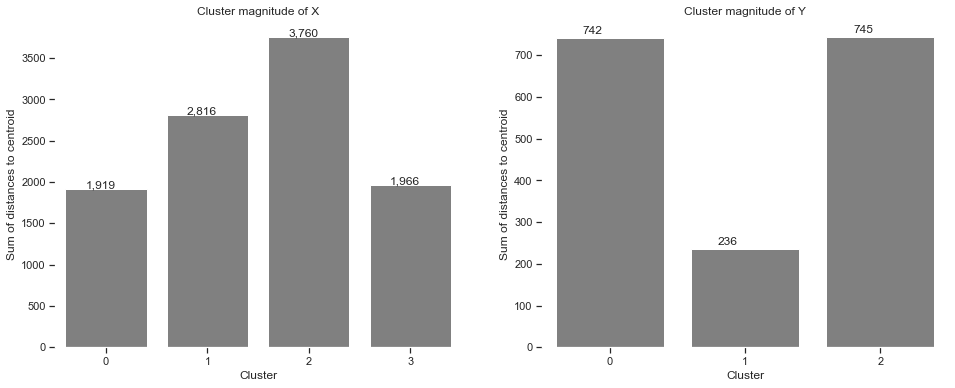

In [59]:
fig, ax=plt.subplots(figsize=(16,6))

# Draw X
plt.subplot(1, 2, 1) # row 1, col 2 index 1
g = sns.barplot(x=magnitude.index, y=magnitude.values, color='grey')
for index,data in enumerate(magnitude):
    plt.text(x=index-0.2 , y=data+10 , s=f"{data:,.0f}")
plt.title("Cluster magnitude of X")
plt.xlabel("Cluster")
plt.ylabel("Sum of distances to centroid")

# Draw Y
plt.subplot(1, 2, 2) # row 1, col 2 index 2
g = sns.barplot(x=magnitudeY.index, y=magnitudeY.values, color='grey')
for index,data in enumerate(magnitudeY):
    plt.text(x=index-0.2 , y=data+10 , s=f"{data:,.0f}")
plt.title("Cluster magnitude of Y")
plt.xlabel("Cluster")
plt.ylabel("Sum of distances to centroid")

Text(0, 0.5, 'Magnitude')

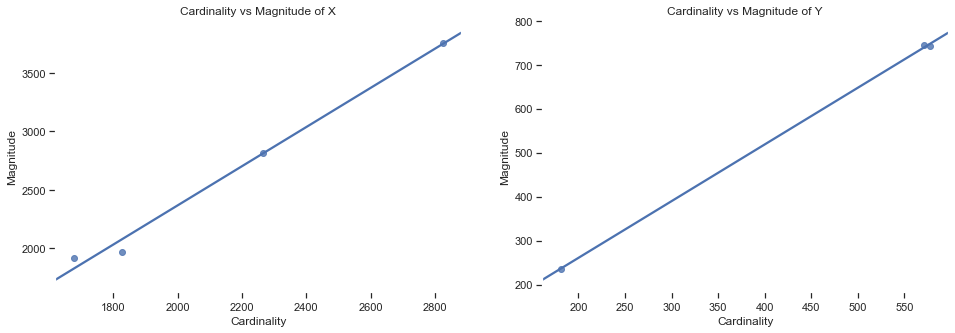

In [60]:
# Plot cardinality vs magnitude
fig, ax=plt.subplots(figsize=(16,5))

# Draw X
plt.subplot(1, 2, 1) # row 1, col 2 index 1
g = sns.regplot(x=freqByCluster, y=magnitude, scatter=True, seed=123,truncate=False, ci=None)
plt.title("Cardinality vs Magnitude of X")
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")

# Draw Y
plt.subplot(1, 2, 2) # row 1, col 2 index 2
g = sns.regplot(x=freqByClusterY, y=magnitudeY, scatter=True, seed=123,truncate=False, ci=None)
plt.title("Cardinality vs Magnitude of Y")
plt.xlabel("Cardinality")
plt.ylabel("Magnitude")

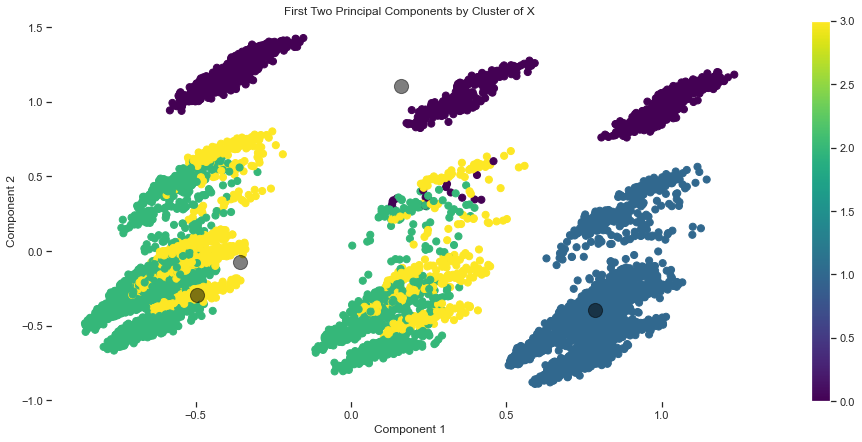

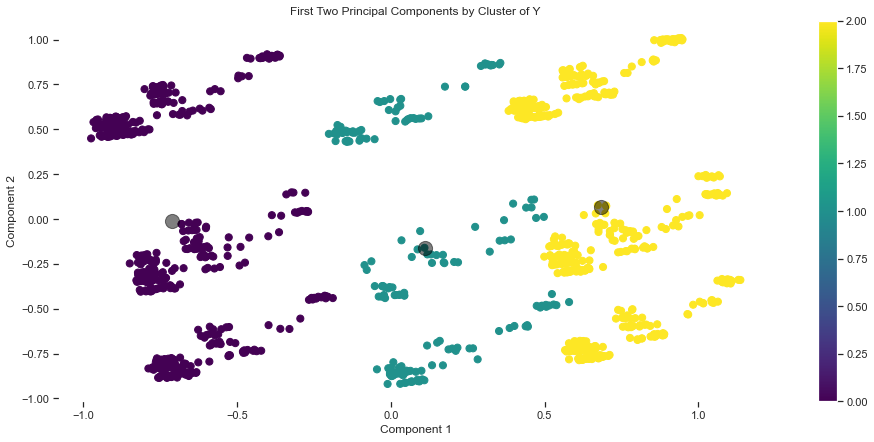

In [61]:
# Scatter plot of the two Principal Components by cluster to see if there is any pattern
# Draw X
fig, ax=plt.subplots(figsize=(16,7))
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=x_kmeans, s=50, cmap='viridis')
centersX = kmeans.cluster_centers_
ax.scatter(centersX[:, 0], centersX[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('First Two Principal Components by Cluster of X')
plt.colorbar()

# Draw Y
fig, ax=plt.subplots(figsize=(16,7))
plt.scatter(Y_pca_reduced[:, 0], Y_pca_reduced[:, 1], c=y_kmeans, s=50, cmap='viridis')
centersY = kmeansY.cluster_centers_
ax.scatter(centersY[:, 0], centersY[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('First Two Principal Components by Cluster of Y')
plt.colorbar()

The cluster with outliers only, on the other hand, is more homogenous where each cluster can be visualized clearly in the scatter plot.

In [62]:
# Create a dataframe with the weights per component of X
wheightsDF = pd.DataFrame(pcaX.components_,columns=X.columns)
wheightsDF

,EducDeg_b'2 - High School',EducDeg_b'1 - Basic',EducDeg_b'3 - BSc/MSc',EducDeg_b'4 - PhD',MonthSal,GeoLivArea_1.0,GeoLivArea_4.0,GeoLivArea_3.0,GeoLivArea_2.0,Children,...,PremHousehold,PremHealth,PremLife,PremWork,AgeBins_18-24,AgeBins_25-34,AgeBins_35-44,AgeBins_45-54,AgeBins_55-64,AgeBins_+65
0,0.642834,0.042075,-0.712343,0.027433,1.450982e-02,-0.057854,0.092621,-0.028537,-0.006231,-9.300502e-02,...,9.854374e-02,6.422338e-02,1.219531e-01,3.740127e-02,0.008768,0.008405,-0.014518,-0.072959,-0.006822,0.077126
1,-0.114607,-0.013092,0.140651,-0.012952,2.119749e-01,-0.105674,0.139387,-0.029049,-0.004665,-6.189557e-01,...,5.302773e-02,1.096957e-01,5.983512e-02,1.233471e-02,-0.002530,-0.074954,-0.313719,-0.181120,-0.011551,0.583875
2,0.044211,0.010888,-0.063899,0.008801,3.783165e-02,0.585897,-0.768304,0.139486,0.042921,-1.183890e-01,...,1.900311e-02,2.632651e-02,2.450435e-02,7.660772e-03,0.003404,-0.006934,-0.068804,-0.024183,-0.024090,0.120606
3,0.069009,-0.023359,-0.068939,0.023289,1.199873e-01,-0.242090,-0.111503,0.308115,0.045478,5.109197e-02,...,-7.350670e-02,-1.620758e-01,-9.046358e-02,-2.487896e-02,-0.004876,-0.037648,-0.633820,0.542864,0.192033,-0.058553
4,-0.018974,0.015816,0.015795,-0.012637,-5.484806e-02,-0.515547,-0.263280,0.697840,0.080987,-2.390970e-02,...,2.940558e-02,6.794563e-02,3.738889e-02,1.252330e-02,0.002140,0.014382,0.292219,-0.219727,-0.137468,0.048454
5,-0.019917,0.022741,0.061403,-0.064227,6.880026e-03,-0.011677,-0.026928,0.054446,-0.015840,7.316469e-02,...,1.165463e-01,7.245154e-02,1.469187e-01,3.655134e-02,0.010036,0.195600,-0.232853,-0.478085,0.739577,-0.234275
6,-0.019585,0.048345,0.071770,-0.100530,-1.908351e-01,0.003527,0.022252,-0.002845,-0.022934,1.176142e-01,...,1.283802e-01,1.648829e-01,1.339325e-01,4.762879e-02,0.021862,0.733248,-0.334891,0.015429,-0.420579,-0.015069
7,-0.537993,0.414070,-0.444783,0.568705,-2.142377e-02,-0.007252,0.014141,0.001557,-0.008446,-1.664873e-02,...,-2.502703e-02,-2.726264e-02,-4.437765e-02,5.647438e-03,0.007618,0.087546,-0.040103,-0.058246,0.006162,-0.002977
8,-0.009501,0.014560,-0.000203,-0.004856,7.562381e-05,-0.259919,-0.219998,-0.379290,0.859206,8.702748e-03,...,1.583655e-02,1.351411e-02,1.137564e-02,2.466624e-03,-0.001460,0.019053,-0.004166,-0.010001,0.006763,-0.010189
9,-0.141088,0.568127,-0.000254,-0.426785,-2.521930e-02,0.003664,0.007844,0.004541,-0.016049,-1.217808e-01,...,2.861881e-01,7.795763e-02,3.301283e-01,8.887672e-02,0.052282,-0.260585,0.061441,0.301328,0.016258,-0.170723


In [63]:
# Create a dataframe with the weights per component of Y
wheightsDFY = pd.DataFrame(pcaY.components_,columns=Y.columns)
wheightsDFY

,EducDeg_b'2 - High School',EducDeg_b'1 - Basic',EducDeg_b'3 - BSc/MSc',EducDeg_b'4 - PhD',MonthSal,GeoLivArea_1.0,GeoLivArea_4.0,GeoLivArea_3.0,GeoLivArea_2.0,Children,...,PremHousehold,PremHealth,PremLife,PremWork,AgeBins_18-24,AgeBins_25-34,AgeBins_35-44,AgeBins_45-54,AgeBins_55-64,AgeBins_+65
0,0.642511,-0.675493,0.030275,0.002707,1.450051e-01,0.074377,-0.104626,0.024336,0.005914,-1.571100e-01,...,-3.627778e-02,5.998135e-02,-4.238268e-02,-5.892968e-02,-0.082381,-0.087668,-0.066338,0.021523,0.071848,0.143016
1,0.077544,-0.015397,-0.059354,-0.002793,6.514514e-02,-0.602651,0.741975,-0.119111,-0.020213,-1.791089e-01,...,-7.972051e-03,6.932044e-03,1.262710e-02,-1.035926e-02,-0.001887,-0.041415,-0.088968,-0.003205,0.011601,0.123874
2,-0.199295,0.148562,0.045286,0.005448,2.127975e-01,0.082935,-0.114282,0.009246,0.022100,-5.165239e-01,...,-4.417199e-03,6.557067e-03,-9.469284e-03,-1.965773e-02,0.056076,-0.659643,0.217708,-0.000030,0.048995,0.336894
3,0.164577,-0.084399,-0.073593,-0.006585,-1.352668e-01,-0.094626,0.124753,0.016354,-0.046482,4.450419e-01,...,1.762105e-02,-2.890121e-02,-7.055130e-03,8.981755e-03,0.013699,-0.420143,0.677475,0.014854,-0.003840,-0.282044
4,0.033631,0.037757,-0.077026,0.005637,-2.312596e-02,-0.533393,-0.323156,0.767500,0.089049,-4.101007e-02,...,9.660784e-03,-6.621653e-03,2.147411e-03,1.512302e-02,0.039935,0.009354,-0.016824,-0.003452,-0.017942,-0.011071
5,-0.383552,-0.297768,0.675852,0.005468,2.802188e-02,-0.076161,0.066255,0.114052,-0.104145,-4.818977e-02,...,-3.713203e-02,6.232907e-02,-6.896201e-02,-5.642915e-02,-0.391558,0.170482,0.243910,-0.015210,0.005525,-0.013148
6,-0.181431,-0.149270,0.325994,0.004706,1.310491e-01,-0.058256,0.018643,0.021784,0.017829,4.148521e-01,...,-2.604137e-02,1.193114e-02,-3.986940e-02,-4.320183e-02,0.460403,-0.348158,-0.442066,0.081353,0.295409,-0.046942
7,-0.014264,-0.222125,0.246614,-0.010225,-3.646069e-01,-0.023464,-0.004048,-0.073156,0.100668,-3.724203e-01,...,2.360204e-02,5.307220e-03,7.413273e-02,5.673903e-02,0.580955,0.043671,0.085738,-0.080945,-0.357694,-0.271726
8,-0.029157,-0.009754,0.044319,-0.005407,3.422823e-02,-0.263167,-0.222118,-0.354235,0.839520,1.851173e-02,...,7.858486e-04,-1.462354e-02,-1.591596e-02,4.711695e-03,-0.144001,0.016201,0.057830,0.016885,0.124252,-0.071167
9,0.024134,0.046000,-0.064792,-0.005343,-4.615383e-02,0.043092,0.032667,0.034586,-0.110345,-3.842695e-01,...,3.056853e-02,-1.023466e-01,5.231293e-03,1.042152e-02,-0.053109,0.021990,-0.008886,-0.032630,0.668615,-0.595980


In [64]:
# Study the weights of component 9
comp = abs(wheightsDF.iloc[9])  ## index 14 is component 15
comp = comp.sort_values(ascending=False)
comp

EducDeg_b'1 - Basic'          0.568127
EducDeg_b'4 - PhD'            0.426785
PremLife                      0.330128
AgeBins_45-54                 0.301328
PremHousehold                 0.286188
AgeBins_25-34                 0.260585
PremMotor                     0.242316
AgeBins_+65                   0.170723
EducDeg_b'2 - High School'    0.141088
Children                      0.121781
PremWork                      0.088877
PremHealth                    0.077958
AgeBins_35-44                 0.061441
AgeBins_18-24                 0.052282
CustMonVal                    0.034013
MonthSal                      0.025219
AgeBins_55-64                 0.016258
GeoLivArea_2.0                0.016049
GeoLivArea_4.0                0.007844
GeoLivArea_3.0                0.004541
GeoLivArea_1.0                0.003664
EducDeg_b'3 - BSc/MSc'        0.000254
Name: 9, dtype: float64

### 5.3 Interpret clusters results

#### Cluster 0 - Seniors
The cluster 0 have the customers with the highest monthly salary (3,758.33) and are considered to be of retirement age (+65; 99%). This cluster has the lowest value in terms of customer monetary value (186.49), this can be expected for clients in this age group because they usually claim more in terms of insurance specifically when it comes to health insurance this can also be seen from having the highest health premium value (218.93). The cluster also has the lowest value for Motor premium’s (258.74) which is also expected for people of old age. This cluster also has the lowest value under children (0.08%), this is expected because it can be assumed that the children of the people in this group are already of working age and are not included under their parent’s insurance.

*Recommended Strategies:*
For this group, it is recommended that ABC Insurance creates, if not existent, specific insurance plans for retirement planning, that includes gold or diamond programs with a higher coverage, for example, so customers can upgrade their plans. This would help the company to increase the group’s monetary value while potentially increasing the retention rate. 

#### Cluster 1 - Blue-Collars
This cluster can be considered to be of the working class, as 100% of the customers in this segment have a high school diploma and their ages range from 35-44 (31%). This group pays the highest in premium life (22.51) and work (41.20), while having the second worst monetary value (200.38). In terms of geographical location, most of the customers live in region 4 (41%) and 89% have children.

*Recommended Strategies:*
This is a group that does not generate much revenue for the company, but still accounts for 32% of ABC’s customers. Since they have children, there is potential to increase the premium health in this segment. Affordable yet with good coverage health insurance plans could be an opportunity to be explored in this group.

#### Cluster 2  - Gold Motor
This segment has the highest customer monetary value (208.40), with the highest premium motor compared to all other segments (364.19). On the other hand, this group has the lowest household (118.46), work (26.70), and health (148.10) premiums values, and it has the lowest salary (2,339.42). Most of them live in geographical location 1 (49.5%) and have children (89%).

*Recommended Strategies:*
There are a lot of opportunities to attract and retain customers from this segment. But before going straight to defining marketing strategies and product development for this group, it would be interesting to understand why most of them have the highest premium motor while the lowest household, work and health insurances. This would help ABC Insurance to streamline its strategies to be more assertive in its decisions. Nonetheless, since they are interested in insuring their vehicles, they might be interested in automotive related content, which could be an opportunity for ABC to educate customers in order to keep claims rate as low as possible while increasing the retention rate.

#### Cluster 3 - Region 4
This segment is the second best in terms of monetary value, but there is nothing peculiar that differentiates this group significantly from the others, except for the fact that 100% of them live in region 4. Besides this, this is an average customer: second lowest premium life, household, health, work, with the second highest premium motor and salaries. This cluster consists of educated individuals with Bsc/Msc education (77%).

*Recommended Strategies:*
There are endless strategies that can be adopted for this group. One of them is to apply digital marketing campaigns targeting specifically well-educated residents of region 4. This can help the company to increase the acquisition of valuable customers. 

#### Outliers Clusters - Diamond
This group represents the ideal customer for ABC Insurance. It consists of all the outliers, and it has the highest monetary value (297.75 and higher) compared to all other clusters. These customers mostly have household (484.16 and higher) and life insurance premiums (94.26 and higher). They har lower monthly salaries (2028.33 and lower) therefore it seems as if this group mostly has basic insurance which is household and life insurance.

*Recommended Strategies:*
Considering that these customers have the highest monetary value compared to all other groups, it is natural that ABC wants to acquire more customers with the same characteristics. However, it is important to note that these customers are outliers, so strategies should be implemented with parsimony.


In [65]:
# Check the mean values of each cluster for top 30 relevant features of X
top_features = comp[:25].index
clustersMeanDF = pd.DataFrame(X_beforeNorm[top_features].groupby(x_kmeans).mean(),columns=top_features)
clustersMeanDF.transpose()

,0,1,2,3
EducDeg_b'1 - Basic',0.062016,0.000000,0.111544,0.108434
EducDeg_b'4 - PhD',0.089445,0.000000,0.113669,0.116101
PremLife,33.387812,33.514490,22.494359,22.447558
AgeBins_45-54,0.000000,0.235762,0.253541,0.225630
PremHousehold,178.266846,174.553554,118.466944,122.929984
AgeBins_25-34,0.000596,0.158057,0.158994,0.160460
PremMotor,258.749356,310.176759,364.197224,364.036610
AgeBins_+65,0.997018,0.046358,0.042847,0.046002
EducDeg_b'2 - High School',0.305903,1.000000,0.000000,0.000000
Children,0.008348,0.891391,0.899433,0.878970


In [66]:
# Check the mean values of each cluster for top 30 relevant features of Y
top_featuresY = comp[:25].index
clustersMeanDFY = pd.DataFrame(Y_beforeNorm[top_features].groupby(y_kmeans).mean(),columns=top_features)
clustersMeanDFY.transpose()

,0,1,2
EducDeg_b'1 - Basic',1.000000,0.000000,0.000000
EducDeg_b'4 - PhD',0.000000,0.027624,0.000000
PremLife,132.660277,94.268177,113.227198
AgeBins_45-54,0.022530,0.033149,0.047285
PremHousehold,652.140121,484.160497,556.629335
AgeBins_25-34,0.348354,0.353591,0.330998
PremMotor,79.893154,150.258674,122.553380
AgeBins_+65,0.105719,0.165746,0.168126
EducDeg_b'2 - High School',0.000000,0.000000,1.000000
Children,0.682842,0.585635,0.637478


## 6. Evaluation

The project was able to develop a customer segmentation and describe the ideal customer for the company using techniques such as principal components analysis and k-means. As a result, five customer segments were presented in this analysis: Seniors, Blue-Collars, Gold Motor, Well-Educated in Region 4, and Diamond; where each one have very unique characteristics that can be used by ABC Insurance Limited to create a more data-driven marketing approach, that can result in the retention rate of customers with high monetary value by 10% and increase the acquisition of customers by at least 15% in the next two quarters. 

In order to achieve these goals, it is suggested that the company creates specific marketing campaigns for each group. For instance, the Gold Motor segment has the highest premium motor value. Campaigns for this group can focus on advertising tiered insurance packages, where tier 1 has a low coverage and tier 3 a high coverage, for example. In addition, since they are interested in insuring their vehicles, they might be interested in automotive related content, which could be an opportunity for ABC to educate customers in order to keep claims rate as low as possible while increasing the retention rate.

When considering the outlier clusters, which have the highest monetary value, it is recommended that ABC takes a more conservative approach initially, exploring this segment and its nuances in depth, since their representativity is relatively lower compared to the other segments, meaning that the risk of non-conversion could be higher, which would increase the cost of acquisition significantly. One interesting approach for this segment could be to create a set of tiered products that includes both life and household insurances. Once there is a conversion, the customer is in the database and other products and services can be offered to them in the future, or even an insurance upgrade (based on the tiers) with a higher coverage.


## 6. Deployment

Once the model is approved by the stakeholders, the last step in the data mining process is to deploy the models to a production environment. Deployment is important because it makes the models available to users so that they can use them to create predictions and make data-driven business decisions. The results of the analysis will be presented to the marketing department of ABC Limited so that they can apply different marketing strategies depending on the type of customers they have. In applying these different strategies the company should also try to understand whether they help to increase their performance. Since customer profiles can vary over time and even as a result of the strategies implemented, it is important that the company provides an updated dataset quarterly in order to always have the most up-to-date campaigns and decisions.

#### Deployment planning
Following the successful outcome of this project, a deployment plan needs to be in place. From the results of the customer segmentation and from the results learnt from the raw dataset the marketing department will not be the  only department that will benefit from the results of the project but other departments too.  As this project will not end once the deployment is done, constant revisions will need to be done in order to always have accurate results. For this project this is how the deployment will be planned in order to make sure that the information reaches the correct departments.

*Stakeholders/Board of directors:* Take the stakeholders through the entire project and present the findings and the recommendations. Once approval from the top management is granted and they are satisfied with the results presented, the other affected departments can then be informed.

*Marketing department:* This is the department that initially requested the customer segmentation, therefore the results of the clustering and the different groups are shared with the department. Recommendation on ideal marketing strategies will be shared with the department based on the characteristics of each group as explained in cluster interpretation.

*Policy writers:* This department could also benefit from the results of the customer segmentation, they could use the clustering results to try to make adjustments to their policies as well as to create attractive packages for clients, especially clients in clusters two and three.

*Data capturers:* For this department the results of the project/clustering would not have an impact on them as much. However, because the project will not end after deployment the dataset that will be used going forward will need to be maintained. For this department the data understanding and data preparation results could be shared with them, to highlight the issues experienced such as deplications found in the dataset or so obvious data capturing errors.


## 8. Conclusion

Following the CRISP-DM model, the aim of this project was to do a customer segmentation of the clients of ABC Insurance Limited. The purpose of the customer segmentation was to assist the Marketing Department of the company to better understand their different customer profiles in order for the department to tailor unique marketing strategies for each group of clients accordingly.

To do the customer segmentation, the k-means algorithm was used to carry out the clustering.  A dataset of the company's clients was provided by the company. Before the k-means algorithm could be applied to the dataset there were some stages of transformation that the data needed to go through before the clustering algorithm could be applied. The transformation from the raw dataset to the final dataset can be found under the sections data understanding and data preparation in this report. Following the transformation of the dataset, it was split into two parts, the first being the data without outliers and the second was the data consisting of only the outliers that remained even after data cleaning.

The first dataset which is the data without outliers resulted in 4 clusters being formed. From the interpretation of these clusters each one was considered to be unique of the other clusters which was considered a good thing because different marketing strategies could be applied to each unique cluster. 
For the outliers dataset three clusters were formed according to the results from the clustering however, after having reviewed the three clusters there was no uniqueness found amongst the clusters therefore these clusters would be presented as a single cluster to the marketing department. 

To conclude, following the outcomes of this project, the project can be considered to be successfully completed as it has addressed both the business and the data mining objectives.


### 9. References

Garbade, Dr. Michael J. 2018. Understanding K-means Clustering in Machine Learning. Available on https://towardsdatascience.com/understanding-k-means- clustering-in-machine-learning-6a6e67336aa1

Onnen, H. 2021. Elbows and Silhouettes: Hands-on Customer Segmentation in Python. https://towardsdatascience.com/elbows-and-silhouettes-hands-on-customer-segmentation-in-python-66c2e794c552

Qualtics XM. What is cluster analysis and when should you use it? Available on: https://www.qualtrics.com/uk/experience-management/research/cluster-analysis/

Tam, Adrian. 2021. Principal Component Analysis for Visualization. Available on: 
https://machinelearningmastery.com/principal-component-analysis-for-visualization/

Upland Software. The Importance of Customer Segmentation. Available on: https://uplandsoftware.com/bluevenn/resources/blog/the-importance-of-customer-segmentation/